In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wine_df = pd.read_csv('wine_data.csv')
wine_df

,OD_read,Proline
0,3.92,1065.0
1,3.40,1050.0
2,3.17,1185.0
3,3.45,1480.0
4,2.93,735.0
...,...,...
173,1.74,740.0
174,1.56,750.0
175,1.56,835.0
176,1.62,840.0


In [3]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OD_read  178 non-null    float64
 1   Proline  178 non-null    float64
dtypes: float64(2)
memory usage: 2.9 KB


#### 와인데이터 시각화

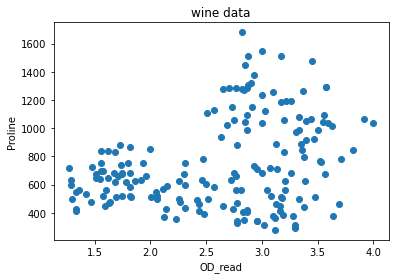

In [4]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1])
plt.title('wine data')
plt.xlabel('OD_read')
plt.ylabel('Proline')
plt.show()

#### K-means

In [5]:
km = KMeans(3)
km_clusters = km.fit_predict(wine_df)
km_clusters

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

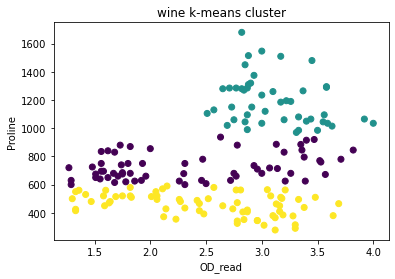

In [7]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=km_clusters)
plt.title('wine k-means cluster')
plt.xlabel('OD_read')
plt.ylabel('Proline')
plt.show()

#### 계층적 군집분석

In [8]:
ac = AgglomerativeClustering(3, linkage='ward')
ac_clusters = ac.fit_predict(wine_df)

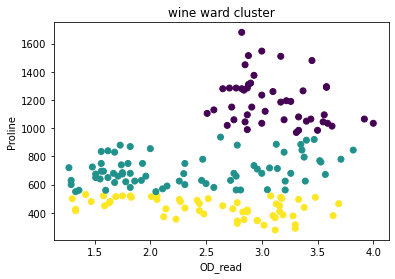

In [10]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=ac_clusters)
plt.title('wine ward cluster')
plt.xlabel('OD_read')
plt.ylabel('Proline')
plt.show()

In [12]:
print('Shilhouetto score\n')
print('k-means :', silhouette_score(wine_df, km_clusters))
print('ward :', silhouette_score(wine_df, ac_clusters))

Shilhouetto score

k-means : 0.5809421087616886
ward : 0.5651908644787632


#### 실루엣 점수
- 1 ~ -1까지 점수나옴
- 클러스터를 완벽하게 분류했을 때 : 1, 그렇지 않은 경우 : 낮은 값
- 얼마나 클러스터가 잘 군집이 형성됐는지 수치로 나타내주는 지표

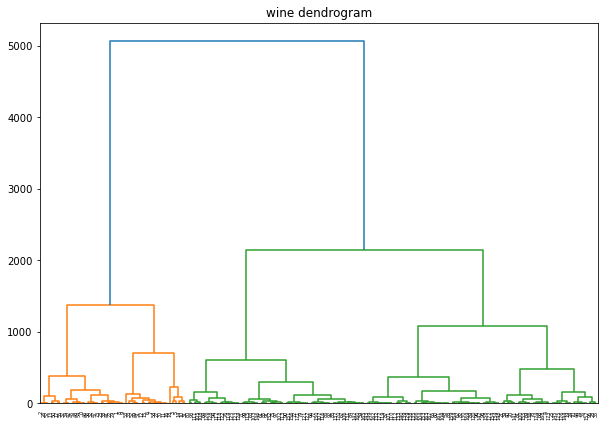

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10,7))
plt.title('wine dendrogram')
d = dendrogram(linkage(wine_df, method='ward'))

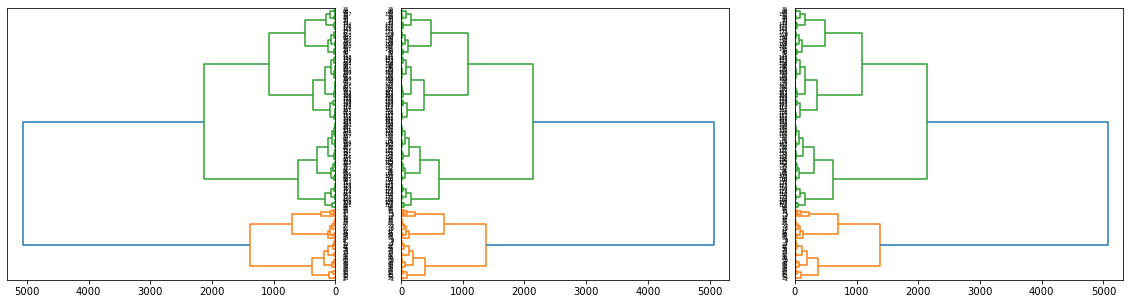

In [18]:
fig = plt.figure(figsize=(20,5))
#댄드로그램 돌려보기
ax1 = fig.add_subplot(1,3,1)
dr1 = dendrogram(linkage(wine_df, method='ward'), orientation='left')

ax2 = fig.add_subplot(1,3,2)
dr2 = dendrogram(linkage(wine_df, method='ward'), orientation='right')

ax3 = fig.add_subplot(1,3,3)
dr3 = dendrogram(linkage(wine_df, method='ward'), orientation='right')